In [1]:
import gather_memtier_statistics as gmts
import graph_xputresp_vs_multigets as xput_vs_multi
import graph_xput_vs_time as xput_vs_time
import graph_responsetime as resptime
import graph_queuelength as queuelen
import summary_table as summ
import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [2]:
exp5_1_dir = "/home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912"
exp5_2_dir = "/home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308"
outdir = "./graphs"

In [3]:
# Experiment 5: MultiGets
# Plot the throughput and response time measured in the middleware

experiment_label = "exp5"

middlewares = ["middleware_04", "middleware_05"]
client_logfiles = ["client_01_0.log", "client_01_1.log", "client_02_0.log", "client_02_1.log", "client_03_0.log", "client_03_1.log"]
dir_suffix_regex_string = "_\d*multiget"
warmup_period_endtime = 10
cooldown_period_starttime = 72
outdir = "./graphs"
num_threads = 6
ylim_xput = 18000
ylim_resp = 2.5
xlim = 10
shard = xput_vs_multi.gather_data(exp5_1_dir, experiment_label, "sharded", middlewares, client_logfiles, dir_suffix_regex_string, warmup_period_endtime, cooldown_period_starttime, outdir, num_threads, ylim_xput, ylim_resp, xlim)
nonshard = xput_vs_multi.gather_data(exp5_2_dir, experiment_label, "nonsharded", middlewares, client_logfiles, dir_suffix_regex_string, warmup_period_endtime, cooldown_period_starttime, outdir, num_threads, ylim_xput, ylim_resp, xlim)

shard = shard.sort_values('multigetSize')


nonshard = nonshard.sort_values('multigetSize')


Input directory is  /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912
Setting is  sharded
Saving all graphs to  ./graphs
Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_3multiget/1/middleware_04/2017-11-24 090230
Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_3multiget/1/middleware_05/2017-11-24 090231
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_3multiget/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_3multiget/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_3multiget/1/client

Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/middleware_05/2017-11-24 090042
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_03_0.log
Extr

Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_3multiget/1/middleware_05/2017-11-24 092554
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_3multiget/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_3multiget/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_3multiget/1/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_3multiget/1/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonshar

Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_6multiget/1/middleware_05/2017-11-24 092741
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_6multiget/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_6multiget/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_6multiget/1/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonsharded_6multiget/1/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_2_multigets_nonsharded_2017-11-24_092308/nonshar

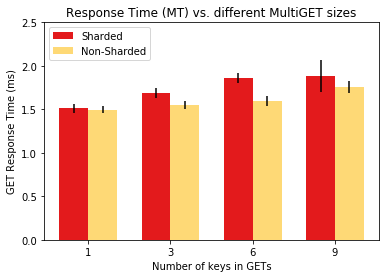

In [4]:
## Response Time

means_shard_resp = shard.loc['mean', 'responsetime']
std_shard_resp = shard.loc['std', 'responsetime']

means_nonshard_resp = nonshard.loc['mean', 'responsetime']
std_nonshard_resp = nonshard.loc['std', 'responsetime']

indices = np.arange(4)
width = 0.35 
fig, ax = plt.subplots()
shard_bar = ax.bar(indices, means_shard_resp, width, color='#e31a1c', yerr=std_shard_resp)
nonshard_bar = ax.bar(indices + width, means_nonshard_resp, width, color='#fed976', yerr=std_nonshard_resp)

ax.legend((shard_bar[0], nonshard_bar[0]), ('Sharded', 'Non-Sharded'), loc='upper left')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylabel('GET Response Time (ms)')
ax.set_xlabel('Number of keys in GETs')
ax.set_title('Response Time (MT) vs. different MultiGET sizes')
ax.set_ylim([0,2.5])

plt.show()
fig.savefig(os.path.join(outdir, experiment_label, "responseTime_multigets.png"), dpi=300)

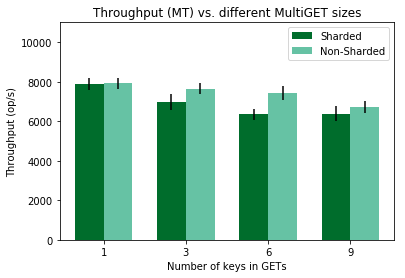

In [5]:
## Request Throughput

means_shard_xput = shard.loc['mean', 'throughput']
std_shard_xput = shard.loc['std', 'throughput']

means_nonshard_xput = nonshard.loc['mean', 'throughput']
std_nonshard_xput = nonshard.loc['std', 'throughput']

indices = np.arange(4)
width = 0.35 
fig, ax = plt.subplots()
shard_bar = ax.bar(indices, means_shard_xput, width, color='#006d2c', yerr=std_shard_xput)
nonshard_bar = ax.bar(indices + width, means_nonshard_xput, width, color='#66c2a4', yerr=std_nonshard_xput)

ax.legend((shard_bar[0], nonshard_bar[0]), ('Sharded', 'Non-Sharded'), loc='upper right')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylabel('Throughput (op/s)')
ax.set_xlabel('Number of keys in GETs')
ax.set_title('Throughput (MT) vs. different MultiGET sizes')
ax.set_ylim([0,11000])

plt.show()
fig.savefig(os.path.join(outdir, experiment_label, "throughput_multigets.png"), dpi=300)

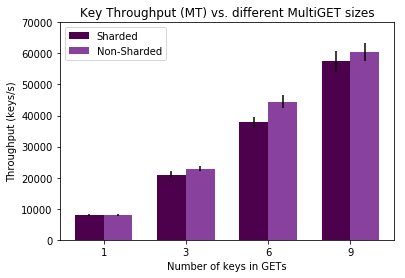

In [14]:
 ## Key Throughput

shard['key_throughput'] = shard['throughput'] * shard['multigetSize']
nonshard['key_throughput'] = nonshard['throughput'] * nonshard['multigetSize']

means_shard_xput = shard.loc['mean', 'key_throughput']
std_shard_xput = shard.loc['std', 'key_throughput']

means_nonshard_xput = nonshard.loc['mean', 'key_throughput']
std_nonshard_xput = nonshard.loc['std', 'key_throughput']

indices = np.arange(4)
width = 0.35 
fig, ax = plt.subplots()
shard_bar = ax.bar(indices, means_shard_xput, width, color='#4d004b', yerr=std_shard_xput)
nonshard_bar = ax.bar(indices + width, means_nonshard_xput, width, color='#88419d', yerr=std_nonshard_xput)

ax.legend((shard_bar[0], nonshard_bar[0]), ('Sharded', 'Non-Sharded'), loc='upper left')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(('1', '3', '6', '9'))
ax.set_ylabel('Throughput (keys/s)')
ax.set_xlabel('Number of keys in GETs')
ax.set_title('Key Throughput (MT) vs. different MultiGET sizes')
ax.set_ylim([0,70000])

plt.show()
fig.savefig(os.path.join(outdir, experiment_label, "key_throughput_multigets.png"), dpi=300)

Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/middleware_04/2017-11-24 090041
Concatenating requestlogs in /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/middleware_05/2017-11-24 090042
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_1multiget/1/client_0

Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_6multiget/1/client_01_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_6multiget/1/client_01_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_6multiget/1/client_02_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_6multiget/1/client_02_1.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_6multiget/1/client_03_0.log
Extracting stats from client log /home/flo/Documents/eth-asl-final-experiment-data/exp5/5_1_multigets_sharded_2017-11-24_085912/sharded_6multiget/1/client_03_1.log
Concatenating re

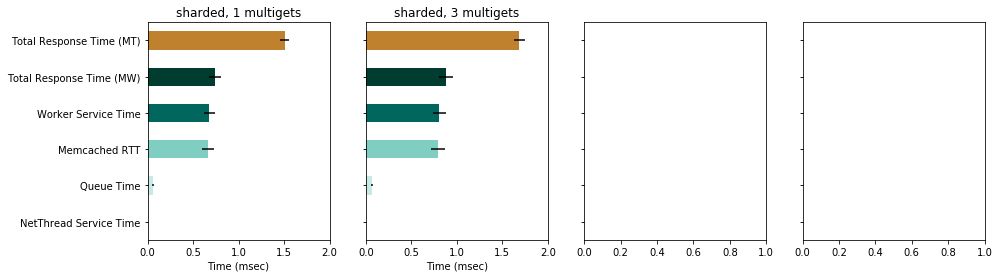

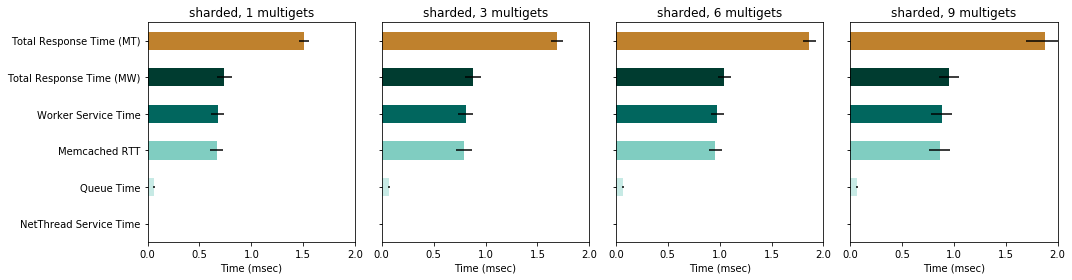

In [21]:
## Drawing the response time break-down of a a few interesting configurations of the sharded experiment
reps = [1, 2, 3]
middlewares = ["middleware_04", "middleware_05"]
client_logfiles = ["client_01_0.log", "client_01_1.log", "client_02_0.log", "client_02_1.log", "client_03_0.log", "client_03_1.log"]
warmup_period_endtime = 10
cooldown_period_starttime = 72
outdir = "./graphs"
experiment_label = "exp5"
xlim=2

fig, axes = plt.subplots(1,4, sharey=True, figsize=(15, 4))
resptime.graph_responsetime(1, "sharded", middlewares, client_logfiles, reps, exp5_1_dir, xlim, axes[0])
resptime.graph_responsetime(3, "sharded", middlewares, client_logfiles, reps, exp5_1_dir, xlim, axes[1])

resptime.graph_responsetime(6, "sharded", middlewares, client_logfiles, reps, exp5_1_dir, xlim, axes[2])
resptime.graph_responsetime(9, "sharded", middlewares, client_logfiles, reps, exp5_1_dir, xlim, axes[3])
fig.tight_layout()
plt.show()

fig.savefig(os.path.join(outdir, experiment_label, "responseTimeBreakDown_sharded.png"), dpi=300)

In [9]:
shard

,initializeClockTime,queueLength,requestSize,responseSize,numHits,numKeysRequested,queueTime_ms,workerServiceTime_ms,memcachedRTT_ms,netthreadServiceTime_ms,responseTime_us,responseTime_ms,throughput_mw,mw,throughput,responsetime,multigetSize
mean,1.511515e+12,0.418508,17.886473,1057.886473,1.0,1.0,0.060653,0.553045,0.539366,0.001279,614.976373,0.614976,3904.444444,0.553478,7868.126984,1.509653,1
std,5.319887e+04,0.062557,0.023071,0.023071,0.0,0.0,0.015003,0.039991,0.039832,0.000225,49.020766,0.049021,540.648754,0.060701,304.733013,0.050499,1
mean,1.511515e+12,0.467488,43.669738,3163.669738,3.0,3.0,0.068985,0.812538,0.790765,0.001596,883.118549,0.883119,3479.576720,0.549637,6993.513228,1.688140,3
std,1.831890e+04,0.072103,0.053338,0.053338,0.0,0.0,0.012917,0.084146,0.084205,0.000331,85.259740,0.085260,489.811423,0.062271,403.524050,0.061715,3
mean,1.511515e+12,0.387329,82.330037,6322.330037,6.0,6.0,0.066666,1.138890,1.116992,0.001938,1207.494135,1.207494,3210.645161,0.541078,6346.841270,1.864065,6
std,1.804244e+04,0.033155,0.044386,0.044386,0.0,0.0,0.013712,0.078213,0.078155,0.000295,77.969468,0.077969,203.175016,0.026449,268.647201,0.059030,6
mean,1.511515e+12,0.392288,121.005298,9481.005298,9.0,9.0,0.068862,0.907087,0.880589,0.002121,978.069236,0.978069,3242.258065,0.515989,6378.000000,1.881069,9
std,1.804459e+04,0.043327,0.051258,0.051258,0.0,0.0,0.014003,0.115930,0.115684,0.000220,115.566282,0.115566,256.039454,0.056525,384.401401,0.184707,9
